In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import packages we will use for importing and extracting information fromsound files

In [2]:
import librosa as lr
from glob import glob

In [3]:
#read the csv file which contains informatiion about the audio files
data_df=pd.read_csv('set_a.csv')
data_df.head()

,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


In [4]:
data_df.isna().sum()

dataset       0
fname         0
label        52
sublabel    176
dtype: int64

In [5]:
#we should also drop the column sublabel because it doesnot have any input
data_df=data_df.drop(labels='sublabel', axis=1)
# rows with missing value doesnot contain any important information, we should drop them
data_df=data_df.dropna(axis=0)

In [6]:
data_df.isna().sum()

dataset    0
fname      0
label      0
dtype: int64

In [7]:
data_df.shape

(124, 3)

## Import Audio files into workspcae using the glob package

In [3]:
audio_files=glob('set_a/*.wav')

In [5]:
print(len(audio_files))

124


In [9]:
# Read the first audio file and plot it
audio, sfreq= lr.load(audio_files[50])
# The frequency of Audio file [0] is
print(sfreq)

22050


In [10]:
print(audio_files[0])

set_a\artifact__201012172012.wav


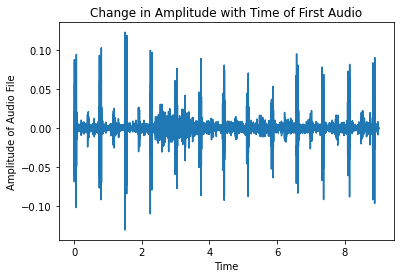

In [11]:
# Create the time range for plotting the frequency
time=np.arange(0,len(audio))/sfreq
# plot the frequency
plt.plot(time, audio)
plt.xlabel("Time")
plt.ylabel("Amplitude of Audio File")
plt.title("Change in Amplitude with Time of First Audio")
plt.savefig("first.png", dpi=300)
plt.show()

In [12]:
print(audio.min())

-0.13108155


In [13]:
data_df[['sfreq','min','mean','max']]=""

In [14]:
for i in range(len(audio_files)):
    audio, sfreq =lr.load(audio_files[i])
    data_df.loc[data_df['fname']==audio_files[i].replace('\\','/'), 'sfreq']=sfreq
    data_df.loc[data_df['fname']==audio_files[i].replace('\\','/'), 'min']=audio.min()
    data_df.loc[data_df['fname']==audio_files[i].replace('\\','/'), 'mean']=audio.mean()
    data_df.loc[data_df['fname']==audio_files[i].replace('\\','/'), 'max']=audio.max()

In [15]:
len(audio_files)

124

## Need to change the label to numeric value so that classification can be done

In [16]:
data_df['class']=""
data_df.loc[data_df.label=='normal', 'class']=0
data_df.loc[data_df.label!='normal','class']=1

In [17]:
data_df.head()

,dataset,fname,label,sfreq,min,mean,max,class
0,a,set_a/artifact__201012172012.wav,artifact,22050,-0.730766,-1.04662e-05,0.712701,1
1,a,set_a/artifact__201105040918.wav,artifact,22050,-0.0173211,-1.10528e-06,0.0158929,1
2,a,set_a/artifact__201105041959.wav,artifact,22050,-0.0204537,4.74498e-07,0.0195355,1
3,a,set_a/artifact__201105051017.wav,artifact,22050,-0.920064,-1.36942e-05,0.762148,1
4,a,set_a/artifact__201105060108.wav,artifact,22050,-0.905326,-2.86369e-05,0.924389,1


## Let's see how a simple machine learning algorithm works on this dataset

In [18]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model=LinearSVC()
#extract the features and label in seperate sheet
X=data_df[['min','mean','max']].values
y=data_df['class'].values.astype(int)
#Split the dataset
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, stratify=y, random_state=111)
model.fit(X_train,y_train)
predictions=model.predict(X_test)
display('The testing accuracy is {}'.format(accuracy_score(y_test, predictions)))
predictions=model.predict(X_train)
display('The training accuracy is {}'.format(accuracy_score(y_train, predictions)))


'The testing accuracy is 0.7368421052631579'

'The training accuracy is 0.7558139534883721'

## This is simple feature engineering for sound waveform. Now lets create an envolpe for the waveform

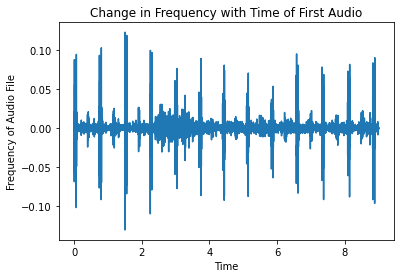

In [19]:
audio, sfreq=lr.load(audio_files[50])
time=np.arange(0,len(audio))/sfreq
plt.plot(time, audio)
plt.xlabel("Time")
plt.ylabel("Frequency of Audio File")
plt.title("Change in Frequency with Time of First Audio")
plt.savefig("2.png", dpi=300)
plt.show()

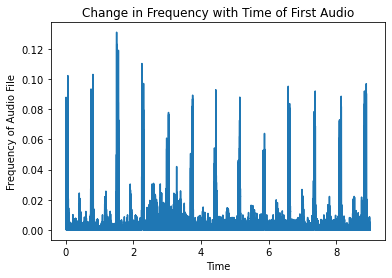

In [20]:
#recitified the -ve values in audio
audio_rect=np.abs(audio)
#plot the graph for rectified
plt.plot(time, audio_rect)
plt.xlabel("Time")
plt.ylabel("Frequency of Audio File")
plt.title("Change in Frequency with Time of First Audio")
plt.savefig("3.png", dpi=300)
plt.show()

In [21]:
print(type(audio))

<class 'numpy.ndarray'>


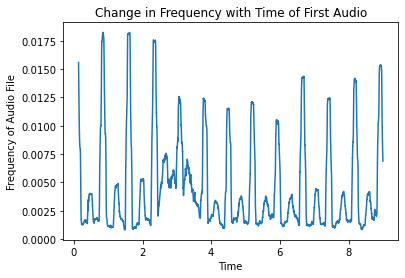

In [22]:
#Now create envolpe using rolling window
audio_env=pd.DataFrame(audio_rect)
audio_env=audio_env.rolling(3000).mean()
audio_env=audio_env.to_numpy()
#plot the graph for smooth audio
plt.plot(time, audio_env)
plt.xlabel("Time")
plt.ylabel("Frequency of Audio File")
plt.title("Change in Frequency with Time of First Audio")
plt.savefig("4.png", dpi=300)
plt.show()

In [23]:
files=[]
names=[]
for i in range(len(audio_files)):
    audio, sfreq=lr.load(audio_files[i])
    names.append(audio_files[i])
    files.append(audio)
audio_all=pd.DataFrame(files)
audio_all['fname']=names
audio_all.head()

,0,1,2,3,4,5,6,7,8,9,...,198441,198442,198443,198444,198445,198446,198447,198448,198449,fname
0,0.000023,-0.000130,-0.000181,-0.000167,-0.000047,0.000095,0.000099,-0.000018,-1.737173e-04,-0.000190,...,-0.000219,-0.000022,0.000048,0.000012,0.000244,0.000144,-0.000116,-0.000029,0.000029,set_a\artifact__201012172012.wav
1,-0.000011,0.000001,0.000002,-0.000002,-0.000004,0.000003,-0.000008,0.000007,7.261384e-07,-0.000010,...,-0.000285,-0.000124,0.000101,0.000287,0.000411,0.000418,0.000145,-0.000062,-0.000168,set_a\artifact__201105040918.wav
2,0.000037,-0.000166,-0.000074,-0.000033,0.000074,0.000153,0.000099,-0.000008,3.541701e-05,0.000035,...,0.000017,0.000081,-0.000151,-0.000108,0.000006,0.000154,0.000076,0.000034,0.000040,set_a\artifact__201105041959.wav
3,-0.002743,-0.006650,-0.004978,-0.008188,-0.005176,0.001318,0.002499,0.005483,7.478257e-03,0.008449,...,-0.001402,-0.000984,0.001026,-0.000925,-0.005180,-0.008277,-0.007573,-0.004743,-0.002580,set_a\artifact__201105051017.wav
4,0.000106,0.001500,0.009725,0.016769,0.019624,0.013949,0.011668,0.010955,1.147425e-02,0.011299,...,-0.000116,0.004989,0.011790,0.015782,0.016439,0.014134,0.011297,0.002116,-0.001515,set_a\artifact__201105060108.wav


In [24]:
audio_all.drop(columns='fname', axis=1, inplace=True)
audio_all_rect=audio_all.apply(np.abs)
audio_all_env=audio_all_rect.rolling(3000, axis=1).mean()

In [25]:
audio_all_env['env_mean']= audio_all_env.mean(axis=1)
audio_all_env['env_std']=audio_all_env.std(axis=1)
audio_all_env['env_max']=audio_all_env.max(axis=1)
audio_all_env['fname']=names

In [26]:
print(audio_all_env[['env_mean','env_std','env_max', 'fname']])

     env_mean   env_std   env_max                             fname
0    0.001324  0.005395  0.043410  set_a\artifact__201012172012.wav
1    0.000299  0.000534  0.003567  set_a\artifact__201105040918.wav
2    0.000485  0.000565  0.003529  set_a\artifact__201105041959.wav
3    0.010100  0.004798  0.027056  set_a\artifact__201105051017.wav
4    0.012662  0.017345  0.125319  set_a\artifact__201105060108.wav
..        ...       ...       ...                               ...
119  0.016419  0.014560  0.047589    set_a\normal__201106221450.wav
120  0.028383  0.030878  0.105636    set_a\normal__201108011112.wav
121  0.020292  0.024005  0.092227    set_a\normal__201108011114.wav
122  0.024787  0.026148  0.093962    set_a\normal__201108011115.wav
123  0.038700  0.029629  0.088527    set_a\normal__201108011118.wav

[124 rows x 4 columns]


## Add these values of envolpe into the main dataset we have created. Merge two dataframes

In [27]:
data_df=data_df.reset_index()
data_df.head()

,index,dataset,fname,label,sfreq,min,mean,max,class
0,0,a,set_a/artifact__201012172012.wav,artifact,22050,-0.730766,-1.04662e-05,0.712701,1
1,1,a,set_a/artifact__201105040918.wav,artifact,22050,-0.0173211,-1.10528e-06,0.0158929,1
2,2,a,set_a/artifact__201105041959.wav,artifact,22050,-0.0204537,4.74498e-07,0.0195355,1
3,3,a,set_a/artifact__201105051017.wav,artifact,22050,-0.920064,-1.36942e-05,0.762148,1
4,4,a,set_a/artifact__201105060108.wav,artifact,22050,-0.905326,-2.86369e-05,0.924389,1


In [30]:
data_df=data_df.merge(audio_all_env[['env_mean','env_std','env_max', 'fname']], on='fname', how='left', left_index=True, right_index=True)
#data_df.reset_index()
data_df.head()

,index,dataset,fname,label,sfreq,min,mean,max,class,env_mean,env_std,env_max
0,0,a,set_a/artifact__201012172012.wav,artifact,22050,-0.730766,-1.04662e-05,0.712701,1,0.001324,0.005395,0.043410
1,1,a,set_a/artifact__201105040918.wav,artifact,22050,-0.0173211,-1.10528e-06,0.0158929,1,0.000299,0.000534,0.003567
2,2,a,set_a/artifact__201105041959.wav,artifact,22050,-0.0204537,4.74498e-07,0.0195355,1,0.000485,0.000565,0.003529
3,3,a,set_a/artifact__201105051017.wav,artifact,22050,-0.920064,-1.36942e-05,0.762148,1,0.010100,0.004798,0.027056
4,4,a,set_a/artifact__201105060108.wav,artifact,22050,-0.905326,-2.86369e-05,0.924389,1,0.012662,0.017345,0.125319


In [31]:
model=LinearSVC()
#extract the features and label in seperate sheet
X=data_df[['env_mean','env_std','env_max']].values
y=data_df['class'].values.astype(int)
#Split the dataset
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, stratify=y, random_state=111)
model.fit(X_train,y_train)
predictions=model.predict(X_test)
display('The testing accuracy is {}'.format(accuracy_score(y_test, predictions)))
predictions=model.predict(X_train)
display('The training accuracy is {}'.format(accuracy_score(y_train, predictions)))

'The testing accuracy is 0.7368421052631579'

'The training accuracy is 0.7558139534883721'

In [32]:
from sklearn.model_selection import cross_val_score
model = LinearSVC()
scores = cross_val_score(model, X, y, cv=5)
print(scores)

[0.76 0.76 0.76 0.72 0.75]


# Tempgraph

In [33]:
audio, sfreq=lr.load(audio_files[50])
audio_tempo = lr.beat.tempo(audio, sr=sfreq, hop_length=2**6, aggregate=None)

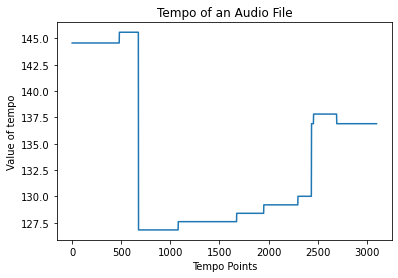

In [34]:
time=np.arange(0,3101)
plt.plot(time,audio_tempo)
plt.xlabel("Tempo Points")
plt.ylabel("Value of tempo")
plt.title("Tempo of an Audio File")
plt.savefig("5.png", dpi=300)
plt.show()

# We can extract features from audio tempo

In [ ]:
files[0]

array([ 2.2960085e-05, -1.2982322e-04, -1.8070513e-04, ...,
       -1.1625490e-04, -2.9164508e-05,  2.9171622e-05], dtype=float32)

In [ ]:
file_temp=[]
for i in range(len(files)):
    print("Starting file {}\n".format(i))
    audio_tempo = lr.beat.tempo(files[i], sr=sfreq, hop_length=2**6, aggregate=None)
    file_temp.append(audio_tempo)
audio_all_tempo=pd.DataFrame(file_temp)
audio_all_tempo['fname']=names
audio_all_tempo.head()

Starting file 0

Starting file 1

Starting file 2

Starting file 3

Starting file 4

Starting file 5

Starting file 6

Starting file 7

Starting file 8

Starting file 9

Starting file 10

Starting file 11

Starting file 12

Starting file 13

Starting file 14

Starting file 15

Starting file 16

Starting file 17

Starting file 18

Starting file 19

Starting file 20

Starting file 21

Starting file 22

Starting file 23

Starting file 24

Starting file 25

Starting file 26

Starting file 27

Starting file 28

Starting file 29

Starting file 30

Starting file 31

Starting file 32

Starting file 33

Starting file 34

Starting file 35

Starting file 36

Starting file 37

Starting file 38

Starting file 39

Starting file 40

Starting file 41

Starting file 42

Starting file 43

Starting file 44

Starting file 45

Starting file 46

Starting file 47

Starting file 48

Starting file 49

Starting file 50

Starting file 51

Starting file 52

Starting file 53

Starting file 54

Starting file 55

St

,0,1,2,3,4,5,6,7,8,9,...,3092,3093,3094,3095,3096,3097,3098,3099,3100,fname
0,84.032012,84.032012,84.032012,84.032012,84.032012,84.032012,84.032012,84.032012,84.032012,84.032012,...,114.209254,114.209254,114.209254,114.209254,114.209254,114.209254,114.209254,114.209254,114.209254,set_a\artifact__201012172012.wav
1,121.599265,121.599265,121.599265,121.599265,121.599265,121.599265,121.599265,121.599265,121.599265,121.599265,...,120.185320,120.185320,120.185320,120.185320,120.185320,120.185320,120.185320,120.185320,120.185320,set_a\artifact__201105040918.wav
2,133.366935,133.366935,133.366935,133.366935,133.366935,133.366935,133.366935,133.366935,133.366935,133.366935,...,187.926136,187.926136,187.926136,187.926136,187.926136,187.926136,187.926136,187.926136,187.926136,set_a\artifact__201105041959.wav
3,134.232955,134.232955,134.232955,134.232955,134.232955,134.232955,134.232955,134.232955,134.232955,134.232955,...,128.396739,128.396739,128.396739,128.396739,128.396739,128.396739,128.396739,128.396739,128.396739,set_a\artifact__201105051017.wav
4,89.488636,89.488636,89.488636,89.488636,89.488636,89.488636,89.488636,89.488636,89.488636,89.488636,...,144.558566,144.558566,144.558566,144.558566,144.558566,144.558566,144.558566,144.558566,144.558566,set_a\artifact__201105060108.wav


In [ ]:
print(audio_all_tempo.shape)

(124, 3102)


In [ ]:
audio_all_tempo['tempo_mean']= audio_all_tempo.mean(axis=1)
audio_all_tempo['tempo_std']=audio_all_tempo.std(axis=1)
audio_all_tempo['tempo_max']=audio_all_tempo.max(axis=1)

In [ ]:
print(audio_all_tempo.columns)

Index([           0,            1,            2,            3,            4,
                  5,            6,            7,            8,            9,
       ...
               3094,         3095,         3096,         3097,         3098,
               3099,         3100, 'tempo_mean',  'tempo_std',  'tempo_max'],
      dtype='object', length=3104)


In [35]:
data_df1=data_df.merge(audio_all_tempo[['tempo_mean','tempo_std','tempo_max', 'fname']], on='fname', how='left', left_index=True, right_index=True)
data_df1.head()

NameError: name 'audio_all_tempo' is not defined

In [ ]:
data_df=data_df.set_index('key_0')
#data_df.drop(columns='index', axis=1, inplace=True)
data_df.head()

,dataset,label,sfreq,min,mean,max,class,env_mean,env_std,env_max,tempo_mean,tempo_std,tempo_max
key_0,,,,,,,,,,,,,
set_a/artifact__201012172012.wav,a,artifact,22050,-0.730766,-1.04662e-05,0.712701,1,0.001324,0.005395,0.043410,117.414923,21.062747,136.899834
set_a/artifact__201105040918.wav,a,artifact,22050,-0.0173211,-1.10528e-06,0.0158929,1,0.000299,0.000534,0.003567,112.012669,9.969253,153.125000
set_a/artifact__201105041959.wav,a,artifact,22050,-0.0204537,4.74498e-07,0.0195355,1,0.000485,0.000565,0.003529,130.103762,22.025754,187.926136
set_a/artifact__201105051017.wav,a,artifact,22050,-0.920064,-1.36942e-05,0.762148,1,0.010100,0.004798,0.027056,111.872001,17.118809,134.232955
set_a/artifact__201105060108.wav,a,artifact,22050,-0.905326,-2.86369e-05,0.924389,1,0.012662,0.017345,0.125319,124.033688,24.434358,161.499023


In [ ]:
model=LinearSVC()
#extract the features and label in seperate sheet
X=data_df[['env_mean','env_std','env_max','tempo_mean','tempo_std','tempo_max']].values
y=data_df['class'].values.astype(int)
#Split the dataset
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, stratify=y, random_state=111)
model.fit(X_train,y_train)
predictions=model.predict(X_test)
display('The testing accuracy is {}'.format(accuracy_score(y_test, predictions)))
predictions=model.predict(X_train)
display('The training accuracy is {}'.format(accuracy_score(y_train, predictions)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


'The testing accuracy is 0.2894736842105263'

'The training accuracy is 0.2558139534883721'

# Spectrogram- Spectral changes to audio with time
1. Timeseries data can be described as a combination of quickly-changing things and slowly changing
things.
2. The simplest way to do this is called a Fourier Transform.
3. A spectrogram is a collection of windowed Fourier transforms over time

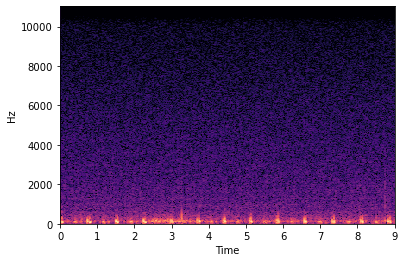

In [103]:
# Import the functions we'll use for the STFT
from librosa.core import stft, amplitude_to_db
from librosa.display import specshow

#load the audio file
audio, sfreq= lr.load(audio_files[50])

# Calculate our STFT
audio_spec, phase = lr.magphase(lr.stft(y=audio))

# Convert into decibels for visualization
spec_db = amplitude_to_db(audio_spec)

# Visualize
specshow(spec_db, sr=sfreq, x_axis='time',
y_axis='hz')
plt.show()

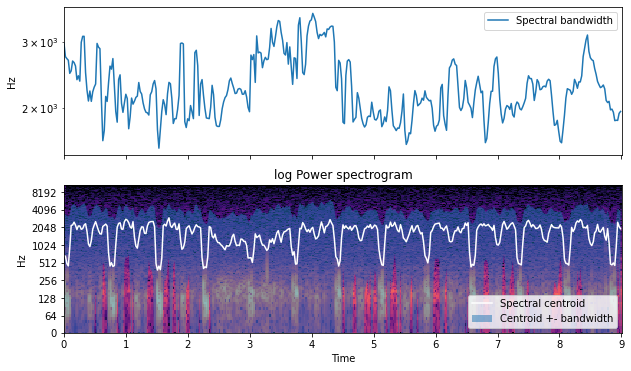

In [106]:

fig, ax = plt.subplots(nrows=2, sharex=True)
times = lr.times_like(bandwidths)
cent = lr.feature.spectral_centroid(y=audio, sr=sfreq)
ax[0].semilogy(times, bandwidths[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
lr.display.specshow(lr.amplitude_to_db(audio_spec), y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
ax[1].fill_between(times, cent[0] - bandwidths[0], cent[0] + bandwidths[0],
                alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, cent[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')
fig.set_size_inches(10,6)
plt.show()

In [107]:
bandwidth_all=[]
centroid_all=[]
names=[]
for i in range(len(audio_files)):
    audio, sfreq=lr.load(audio_files[i])
    bandwidths=lr.feature.spectral_bandwidth(y=audio, sr=sfreq)
    centroid=lr.feature.spectral_centroid(y=audio, sr=sfreq)
    bandwidth_all.append(np.mean(bandwidths))
    centroid_all.append(np.mean(centroid))
    names.append(audio_files[i])
spec=np.column_stack([names, bandwidth_all, centroid_all])



                                  0                   1                   2
0  set_a\artifact__201012172012.wav  2787.0111925557085  3555.0563326183938
1  set_a\artifact__201105040918.wav  2591.9715950626555   5135.728316965194
2  set_a\artifact__201105041959.wav  2958.6982907455367   4140.214880009366
3  set_a\artifact__201105051017.wav   2283.059735436144  2244.7611967457515
4  set_a\artifact__201105060108.wav  2469.5097278355724  2374.0033573854994


In [108]:
audio_spec=pd.DataFrame(spec, columns=['fname', 'bandwidths','centroid'])
print(audio_spec.head())

                              fname          bandwidths            centroid
0  set_a\artifact__201012172012.wav  2787.0111925557085  3555.0563326183938
1  set_a\artifact__201105040918.wav  2591.9715950626555   5135.728316965194
2  set_a\artifact__201105041959.wav  2958.6982907455367   4140.214880009366
3  set_a\artifact__201105051017.wav   2283.059735436144  2244.7611967457515
4  set_a\artifact__201105060108.wav  2469.5097278355724  2374.0033573854994


In [ ]:
data_df=data_df.merge(audio_spec[['fname', 'bandwidths','centroid']], on='fname', how='left', left_index=True, right_index=True)
data_df.head()

In [112]:
data_df.drop(columns='index', axis=1, inplace=True)
data_df.head()

,dataset,fname,label,sfreq,min,mean,max,class,env_mean,env_std,env_max,bandwidths,centroid
0,a,set_a/artifact__201012172012.wav,artifact,22050,-0.730766,-1.04662e-05,0.712701,1,0.001324,0.005395,0.043410,2787.0111925557085,3555.0563326183938
1,a,set_a/artifact__201105040918.wav,artifact,22050,-0.0173211,-1.10528e-06,0.0158929,1,0.000299,0.000534,0.003567,2591.9715950626555,5135.728316965194
2,a,set_a/artifact__201105041959.wav,artifact,22050,-0.0204537,4.74498e-07,0.0195355,1,0.000485,0.000565,0.003529,2958.6982907455367,4140.214880009366
3,a,set_a/artifact__201105051017.wav,artifact,22050,-0.920064,-1.36942e-05,0.762148,1,0.010100,0.004798,0.027056,2283.059735436144,2244.7611967457515
4,a,set_a/artifact__201105060108.wav,artifact,22050,-0.905326,-2.86369e-05,0.924389,1,0.012662,0.017345,0.125319,2469.5097278355724,2374.0033573854994
